In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

Extración de Data Frame

In [2]:
house = pd.read_csv('house_train_raw.csv', sep= ',', decimal= '.', encoding= 'utf-8')

In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Tranformando variables categoricas en numericas

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [5]:
ho_2 = house.copy()

In [6]:
columns = house.select_dtypes(include = ["object"]).columns

In [7]:
for i in columns:
    le = preprocessing.LabelEncoder()
    le.fit(ho_2[i])
    ho_2[i] = le.transform(ho_2[i])

In [8]:
ho_3 = house.copy()

Utilizamos get dummies

In [9]:
ho_3 = pd.get_dummies(ho_3, dummy_na=True)

In [10]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import mutual_info_regression
selector = SelectKBest(mutual_info_regression, k=15)

In [11]:
from scipy import stats
from scipy.stats.stats import pearsonr

C:\Users\pablo\AppData\Local\Temp\ipykernel_6208\3829072014.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [12]:
X1= ho_3.copy()

In [13]:
X1.drop(['SalePrice','Id'], axis= 1, inplace = True)

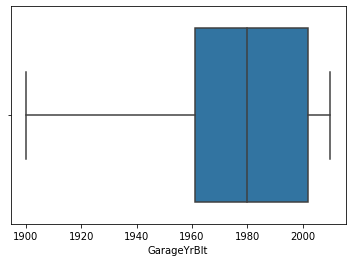

In [14]:
ax = sns.boxplot(x=X1["GarageYrBlt"])

In [15]:
X1.isna().any()[X1.isna().any()== True]

LotFrontage    True
MasVnrArea     True
GarageYrBlt    True
dtype: bool

Imputando valores faltates

In [16]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')

In [17]:
LotFrontage = X1.LotFrontage.values
imp.fit(LotFrontage.reshape(-1,1))
print(imp.statistics_)

[70.04995837]


In [18]:
LotFrontage_imputed = imp.transform(LotFrontage.reshape(-1,1))
print(LotFrontage_imputed[:10])

[[65.        ]
 [80.        ]
 [68.        ]
 [60.        ]
 [84.        ]
 [85.        ]
 [75.        ]
 [70.04995837]
 [51.        ]
 [50.        ]]


In [19]:
X1['LotFrontage']= LotFrontage_imputed

In [20]:
imp = SimpleImputer(strategy='mean')
MasVnrArea = X1.MasVnrArea.values
imp.fit(MasVnrArea.reshape(-1,1))
print(imp.statistics_)
MasVnrArea_imputed = imp.transform(MasVnrArea.reshape(-1,1))
X1['MasVnrArea']= MasVnrArea_imputed

[103.68526171]


In [21]:
imp = SimpleImputer(strategy='mean')
GarageYrBlt = X1.GarageYrBlt.values
imp.fit(GarageYrBlt.reshape(-1,1))
print(imp.statistics_)
GarageYrBlt_imputed = imp.transform(GarageYrBlt.reshape(-1,1))
X1['GarageYrBlt']= GarageYrBlt_imputed

[1978.50616389]


Separación de target

In [22]:
Y = ho_3[['SalePrice']]

Hacemos una selección de features mas relevantes para hacer un modelo de Regresión linal

In [23]:
selector = SelectKBest(mutual_info_regression, k=15)
Xnew = selector.fit_transform(X1,Y)

c:\Users\pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
Xnew = pd.DataFrame(Xnew)

Instamciamos kbes poniendo como parametro que haremos una regresión

In [25]:
Xnew2= SelectKBest(f_regression , k=15).fit_transform(X1,Y)
Xnew2 = pd.DataFrame(Xnew2)

c:\Users\pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cargamos el resultado en un nuevo Data Frame de 15 features

In [26]:
Xnew2 = pd.DataFrame(Xnew2)

Sacando los mejores coef de pearson

In [27]:
out_list = []
for column in X1.columns:
    corr_tuple = pearsonr(X1[column], Y)
    out_list.append([column, corr_tuple[0], corr_tuple[1]])

c:\Users\pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Armamos un Data Frame con el ranking de los mejores coef de pearson

In [28]:
corr_df = pd.DataFrame(out_list, columns=["Features", "Correlation", "P-Value"])

In [29]:
corr_df.sort_values(by=['P-Value'], inplace=True)

Opción 1 - con los mejores coef de pearson

In [74]:
from sklearn.model_selection import train_test_split

a = corr_df.head(15).Features.tolist()
Xn = X1[a]
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xn, Y, test_size = 0.2)

Opción 2 - por kBest 1

In [32]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xnew, Y, test_size = 0.2)

Opción 3 - por KBest2

In [33]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(Xnew2, Y, test_size = 0.2)

In [34]:
from sklearn.metrics import mean_squared_error, precision_score, recall_score, make_scorer, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


Intanciamos un pipe linea y luego un gridsearch

In [35]:
pipe= Pipeline ([
    ('model', LinearRegression())])

In [36]:
parameters = {'model__fit_intercept':[True,False], 'model__normalize':[True,False], 'model__copy_X':[True,False]}

In [37]:
mod = GridSearchCV( estimator = pipe ,
                    param_grid= parameters,
                    scoring= {'precision' : make_scorer(precision_score), 'rmse': make_scorer(mean_squared_log_error)},
                    refit= 'precision',
                    n_jobs= -1,
                    cv=100)

In [ ]:
mod.best_params_

Resultado 1

In [75]:
mod.fit(X_train1, y_train1)

c:\Users\pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


GridSearchCV(cv=100, estimator=Pipeline(steps=[('model', LinearRegression())]),
             n_jobs=-1,
             param_grid={'model__copy_X': [True, False],
                         'model__fit_intercept': [True, False],
                         'model__normalize': [True, False]},
             refit='precision',
             scoring={'precision': make_scorer(precision_score),
                      'rmse': make_scorer(mean_squared_log_error)})

In [76]:
pred = mod.predict(X_test1)
mean_squared_log_error (y_test1, pred, squared=False)

0.17341437619152542

Resultado 2

In [42]:
mod.fit(X_train2, y_train2)
pred = mod.predict(X_test2)
mean_squared_log_error (y_test2, pred, squared=False)

c:\Users\pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.17156461558987152

Resultado 3

In [43]:
mod.fit(X_train3, y_train3)
pred = mod.predict(X_test3)
mean_squared_log_error (y_test3, pred, squared=False)

c:\Users\pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.16835688157914758

Mejor resultado obetenido

KNeighborsRegressor

Intanciamos primeramente un pipeline donde realizamos una Standarización de los valores

In [44]:
pipe1 = Pipeline ([
    ('scale', StandardScaler()),
    ('model', KNeighborsRegressor())])

In [45]:
parameters1 = {'model__n_neighbors':[10]}

In [46]:
mod1 = GridSearchCV( estimator = pipe1,
                    param_grid= parameters1,
                    scoring= {'precision' : make_scorer(precision_score), 'rmse': make_scorer(mean_squared_log_error)},
                    refit= 'rmse',
                    # error_score= 'raise' ,
                    cv=100)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = 0.2)

In [48]:
mod1.fit(X_train, y_train)

c:\Users\pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Users\pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\Users\pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precis

GridSearchCV(cv=100,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [10]}, refit='rmse',
             scoring={'precision': make_scorer(precision_score),
                      'rmse': make_scorer(mean_squared_log_error)})

In [ ]:
pd.DataFrame(mod1.cv_results_)

In [49]:
pred1 = mod1.predict(X_test)

Obtenemos un resultado muy similar al la que obtuvimos con La regresión lineal

In [50]:
mean_squared_log_error(y_test, pred1, squared=False)

0.20398344102733174

RandomForest

In [454]:
from sklearn.ensemble import RandomForestRegressor

In [455]:
grid_rfr_log = GridSearchCV(
    estimator= RandomForestRegressor(),
    param_grid={'n_estimators': [100,200,300,400,500,600],  
               'max_features': [1.0,'sqrt', 'log2', None],  
               'max_depth': [ 10, 15, 20, 25, 60, 70, 80, 90, 100]},
    cv=15,
    n_jobs= -1
)
grid_rfr_log.fit(X_train, y_train)
grid_rfr_log.best_estimator_

c:\Users\pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomForestRegressor(max_depth=25, max_features='log2')

In [456]:
grid_rfr_log.predict()

RandomForestRegressor(max_depth=25, max_features='log2')

In [457]:
pred2 = grid_rfr_log.predict(X_test)

In [458]:
mean_squared_log_error(y_test, pred2, squared=False)

0.1721362464749616

Debido a que el mejor resultado se dio con el modelo re regresión linea utlizando kbest, realizamos el mismo procedimiento con el data set de prueba

In [52]:
test = pd.read_csv('houses_test_raw.csv', sep= ',', decimal= '.', encoding= 'utf-8')

In [53]:
test = pd.get_dummies(test, dummy_na=True)

In [55]:
test.drop('Id', axis= 1, inplace = True)

In [58]:
test.isna().any()[test.isna().any()== True]

LotFrontage     True
MasVnrArea      True
BsmtFinSF1      True
BsmtFinSF2      True
BsmtUnfSF       True
TotalBsmtSF     True
BsmtFullBath    True
BsmtHalfBath    True
GarageYrBlt     True
GarageCars      True
GarageArea      True
dtype: bool

In [60]:
bb = ['LotFrontage','MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars','GarageArea']

In [ ]:
imp = SimpleImputer(strategy='mean')
MasVnrArea = test.MasVnrArea.values
imp.fit(MasVnrArea.reshape(-1,1))
print(imp.statistics_)
MasVnrArea_imputed = imp.transform(MasVnrArea.reshape(-1,1))
test['MasVnrArea']= MasVnrArea_imputed

In [ ]:
for i in bb:
    imp = SimpleImputer(strategy='median')
    aa = test[i].values
    imp.fit(aa.reshape(-1,1))
    print(imp.statistics_)
    imputed = imp.transform(aa.reshape(-1,1))
    test['[i]']= imputed

In [77]:
test = X1[a]
test

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,ExterQual_TA,FullBath,BsmtQual_Ex,TotRmsAbvGrd,YearBuilt,KitchenQual_TA,YearRemodAdd,KitchenQual_Ex,Foundation_PConc
0,7,1710,2,548,856,856,0,2,0,8,2003,0,2003,0,1
1,6,1262,2,460,1262,1262,1,2,0,6,1976,1,1976,0,0
2,7,1786,2,608,920,920,0,2,0,6,2001,0,2002,0,1
3,7,1717,3,642,756,961,1,1,0,7,1915,0,1970,0,0
4,8,2198,3,836,1145,1145,0,2,0,9,2000,0,2000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,1,2,0,7,1999,1,2000,0,1
1456,6,2073,2,500,1542,2073,1,2,0,7,1978,1,1988,0,0
1457,7,2340,1,252,1152,1188,0,2,0,9,1941,0,2006,0,0
1458,5,1078,1,240,1078,1078,1,1,0,5,1950,0,1996,0,0


In [105]:
pred = mod.predict(test)
pred

array([[213820.83233429],
       [161549.1374144 ],
       [216228.7683788 ],
       ...,
       [220527.53149802],
       [128012.42056222],
       [137939.0383835 ]])

In [116]:
h = pred.tolist()

In [115]:
type (h)

list

In [119]:
h[0]

[213820.83233428746,
 161549.1374144028,
 216228.76837879815,
 193410.70614315057,
 267948.2387088551,
 153057.37371797417,
 285167.6108325666,
 208567.70585964317,
 177605.05197852524,
 107687.84661279572,
 117910.17016477557,
 363580.9883088926,
 107481.466040537,
 230724.89687828952,
 142744.40896648634,
 145877.4946132442,
 144675.81019811262,
 115164.31380250398,
 158547.45938078733,
 130690.31861642911,
 318104.3298889487,
 136760.35520365532,
 247183.16051890329,
 135207.79226129246,
 133831.8653156897,
 251883.738257305,
 132523.12743061222,
 299883.537353148,
 155479.78270127182,
 63195.74884832138,
 93252.91087415721,
 144615.50394940889,
 256950.93807975436,
 171453.41442708974,
 322335.60951507837,
 318852.6360060116,
 147161.2805394542,
 148215.7053744297,
 129784.33134115464,
 79161.00076320244,
 157146.66370224627,
 132379.12908559781,
 135378.29501991603,
 116655.69669819833,
 122043.13016252476,
 334213.288262635,
 287460.56214532885,
 254713.6237620199,
 98100.2106367

In [120]:
pred_test_df = pd.DataFrame( h[0], columns= ['pred'])


In [121]:
pred_test_df

,pred
0,213820.832334
1,161549.137414
2,216228.768379
3,193410.706143
4,267948.238709
...,...
1455,181590.381251
1456,208893.216714
1457,220527.531498
1458,128012.420562


In [122]:
pred_test_df.to_csv("pred_test.csv", index=False)